Import all the libraries that are needed:

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import matplotlib.lines as mlines
plt.rcParams['figure.figsize'] = (8,6)
%matplotlib inline
from sklearn import svm
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV



pd.set_option('display.max_columns', None)
# функция, позволяющая выводить графики прямо в ноутбук
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.metrics import mean_squared_error

Read the data:

In [81]:
data_training = pd.read_csv('C:/Users/Marianna Rybnikova/Desktop/Graphs_NN/sorted_binary_data_TEST.txt', header=None) 
data_testing = pd.read_csv('C:/Users/Marianna Rybnikova/Desktop/Graphs_NN/sorted_binary_data_TRAIN.txt', header=None) 

data_testing.columns = ['Card ' + str(i) for i in range(1, 6)] + ['Combination']
data_training.columns = ['Card ' + str(i) for i in range(1, 6)] + ['Combination']

features_test = data_testing.drop(('Combination'), axis=1)  # Выбрасываем столбец 'Combination'.
features_train = data_training.drop(('Combination'), axis=1)
answers_test = data_testing['Combination']
answers_train = data_training['Combination']

# K-Neighbors Classification

Fit the model and do the prediction:

In [82]:
knn = KNeighborsClassifier(n_neighbors=4) # одинаковые веса; в ачестве метрики евклидово расстояние
knn.fit(features_train, answers_train)
predicted_value = knn.predict(features_test)
print(predicted_value)

[0 1 1 ... 1 1 1]


Plot training accuracy VS testing accuracy

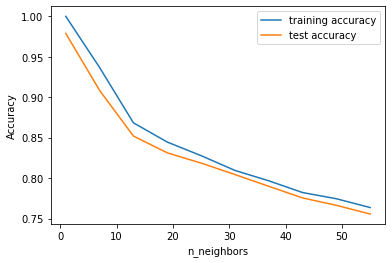

In [83]:

training_accuracy = [] 
test_accuracy = []
# try n_neighbors from 1 to 10 
neighbors_settings = range(1, 61, 6)
for n_neighbors in neighbors_settings:
# build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors) 
    clf.fit(features_train, answers_train)
# record training set accuracy 
    training_accuracy.append(clf.score(features_train, answers_train)) # record generalization accuracy 
    test_accuracy.append(clf.score(features_test, answers_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

MSE:

In [84]:
mean_squared_error(answers_test, predicted_value)

0.164783

MAE:

In [85]:
errors = abs(predicted_value - answers_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'points')

#accuracy_score(answers_test, predictions)

Mean Absolute Error: 0.09 points


Accuracy:

In [86]:
correct = 0
for i in range (0, len(predicted_value)):
    if (round(predicted_value[i]) == answers_test[i]):
        correct += 1
accuracy_knn_c = round(((correct / len(predicted_value)) * 100), 2)
print ("accuracy of the algorithm:", accuracy_knn_c, "%")
correct

accuracy of the algorithm: 93.38 %


933806

Find optimal number of neighbors

In [87]:
metrics_2 = []
for n in range(1, 30, 3):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(features_train, answers_train)
    #scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    #metrics.append(np.mean(scores))
    metrics_2.append(mean_squared_error(answers_test, knn.predict(features_test)))

Text(0.5, 0, 'Number of neighbors for KNN Classification')

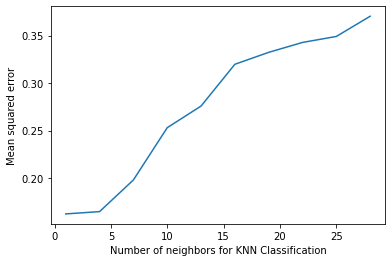

In [88]:
plt.plot(range(1, 30, 3), metrics_2)
plt.ylabel('Mean squared error')
plt.xlabel('Number of neighbors for KNN Classification')

# K-Nearest Neighbors Regression

Do the prediction:

In [89]:
knn = KNeighborsRegressor(n_neighbors=4) # одинаковые веса; в ачестве метрики евклидово расстояние
knn.fit(features_train, answers_train)
predicted_value = knn.predict(features_test)
print(predicted_value)

[1.25 1.   1.   ... 1.   1.   1.5 ]


Calculate the accuracy:

In [90]:
correct = 0
for i in range (0, len(predicted_value)):
    if (round(predicted_value[i]) == answers_test[i]):
        correct += 1
accuracy_knn_r = round((correct / len(predicted_value)) * 100, 2)
print ("accuracy of the algorithm:", (correct / len(predicted_value)) * 100, "%")
correct

accuracy of the algorithm: 92.3997 %


923997

Find optimal number of neighbors for KNN Classification and Regression

In [91]:
metrics = []
for n in range(1, 30, 3):
    knn = KNeighborsRegressor(n_neighbors=n)
    knn.fit(features_train, answers_train)
    #scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    #metrics.append(np.mean(scores))
    metrics.append(mean_squared_error(answers_test, knn.predict(features_test)))

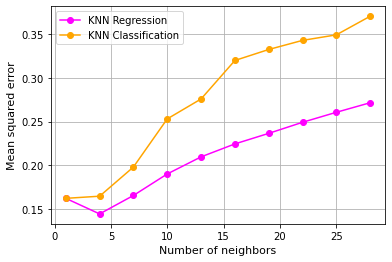

In [92]:
plt.plot(range(1, 30, 3), metrics, color='magenta', marker='o', label='KNN Regression')
plt.plot(range(1, 30, 3), metrics_2, color='orange', marker='o', label='KNN Classification')

plt.xlabel('Number of neighbors', fontsize = 11)
plt.ylabel('Mean squared error', fontsize = 11)
plt.legend()
plt.grid(True)
plt.show()

# Random Forest Classification

Do the prediction:

In [93]:
clf_rf = RandomForestClassifier(max_depth=n, random_state=1)
clf_rf.fit(features_train, answers_train)
predictions = clf_rf.predict(features_test)

Calculate accuracy:

In [94]:
correct = 0
for i in range (0, len(predictions)):
    if (round(predictions[i]) == answers_test[i]):
        correct += 1
accuracy_rf_r = round((correct / len(predictions)) * 100, 3)
print ("accuracy of the algorithm:", (correct / len(predictions)) * 100, "%")
correct

accuracy of the algorithm: 96.475 %


964750

Now find the optimal depth of the decision tree:

In [95]:
metrics3 = []
for n in range (1, 15):
    clf_rf = RandomForestClassifier(max_depth=n, random_state=1)
    clf_rf.fit(features_train, answers_train)
    predictions = clf_rf.predict(features_test)
    metrics3.append(mean_squared_error(answers_test, predictions))

In [96]:
metrics4 = []
for m in range (1, 15):
    clf_rf = RandomForestRegressor(max_depth=m, random_state=1)
    clf_rf.fit(features_train, answers_train)
    predictions = clf_rf.predict(features_test)
    metrics4.append(mean_squared_error(answers_test, predictions))

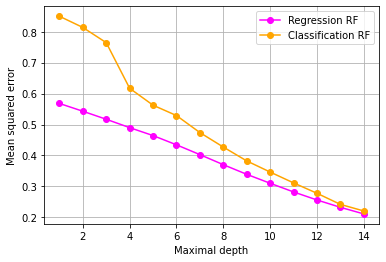

In [97]:
plt.plot(range(1, 15), metrics4, color='magenta', marker = 'o', label = 'Regression RF')
plt.plot(range(1, 15), metrics3, color='orange', marker='o',label = 'Classification RF')
#for i_x, i_y in zip(range(1, 100, 10), metrics3):
    #plt.text(i_x, i_y, '  ({}, {})'.format(i_x, i_y), rotation='45')
plt.ylabel('Mean squared error')
plt.xlabel('Maximal depth', )
plt.grid(True)
plt.legend()
plt.show()

Do the prediction fo Regression:

In [98]:
clf_rf = RandomForestRegressor(max_depth=10, random_state=1)
clf_rf.fit(features_train, answers_train)
predictions3 = clf_rf.predict(features_test)

Calculate the accuracy:

In [99]:
correct6 = 0
for i in range (0, len(predictions3)):
    if (round(predictions3[i]) == answers_test[i]):
        correct6 += 1
print ("accuracy of the algorithm:", (correct6 / len(predictions3)) * 100, "%")
acc_rf_c = round(correct6 / len(predictions3) * 100,2)
correct6

accuracy of the algorithm: 77.6892 %


776892

Do the prediction for Classification:

In [100]:
clf_rf = RandomForestClassifier(max_depth=10, random_state=1)
clf_rf.fit(features_train, answers_train)
predictions34= clf_rf.predict(features_test)

Calculate the accuracy:

In [101]:
correct7 = 0
for i in range (0, len(predictions34)):
    if (round(predictions34[i]) == answers_test[i]):
        correct7 += 1
print ("accuracy of the algorithm:", (correct7 / len(predictions34)) * 100, "%")
acc_rf_r = round(correct7 / len(predictions3) * 100,2)
correct7

accuracy of the algorithm: 80.3334 %


803334

# Decision Tree Classification

Do predictions:

In [104]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth=2)
clf = clf.fit(features_train, answers_train)
y_pred = clf.predict(features_test)

In [105]:
from sklearn import tree

Plot the obtained decision tree:

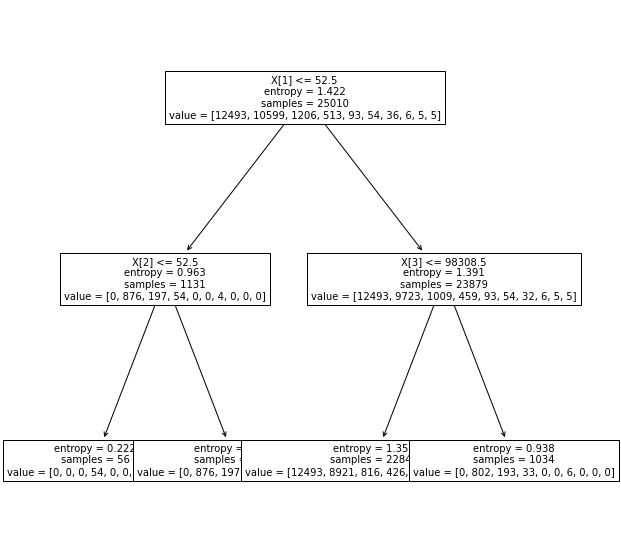

In [106]:
plt.figure(figsize=(10,10))  # set plot size (denoted in inches)
tree.plot_tree(clf, fontsize=10)
plt.show()

Find the optimal depth of the decision tree:

In [107]:
acc = []
for i in range (1, 40):
    clf = DecisionTreeClassifier(criterion = 'entropy', max_depth=i)
    clf = clf.fit(features_train, answers_train)
    y_pred2 = clf.predict(features_test)
    acc.append(mean_squared_error(answers_test, y_pred2))

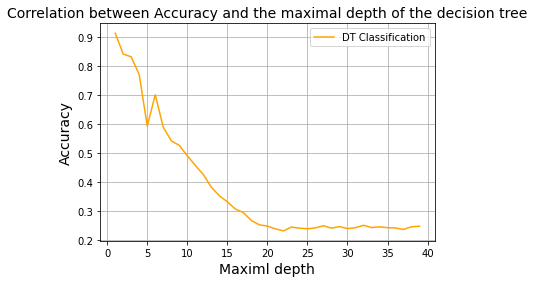

In [108]:
plt.plot(range(1, 40), acc, color='orange', label='DT Classification')

#plt.plot(range(1, 300, 5), acc_2, color='orange', marker='o', label='DT Classification')
plt.title('Correlation between Accuracy and the maximal depth of the decision tree', fontsize=14)
plt.xlabel('Maximl depth', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [109]:
print("Accuracy:", accuracy_score(answers_test, y_pred))
accuracy_dt_c = round(accuracy_score(answers_test, y_pred) * 100,2)

Accuracy: 0.567569


# Decision Tree Regression

Do predictions:

In [110]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_1.fit(features_train, answers_train)
y_1 = regr_1.predict(features_test)

Calculate MSE:

In [111]:
mean_squared_error(answers_test, y_1)

0.5550062040604529

Find the optimal depth and plot the graph:

In [112]:
flag = 0
acc2 = []

for i in range (1, 40):
    clf2 = DecisionTreeRegressor(max_depth=i)
    clf2.fit(features_train, answers_train)
    y_pred2 = clf2.predict(features_test)
    acc2.append(mean_squared_error(answers_test, y_pred2))


In [113]:

clf = DecisionTreeRegressor(max_depth=3)
clf = clf.fit(features_train, answers_train)
y_pred = clf.predict(features_test)
mean_squared_error(answers_test, y_pred)

0.5378339016011124

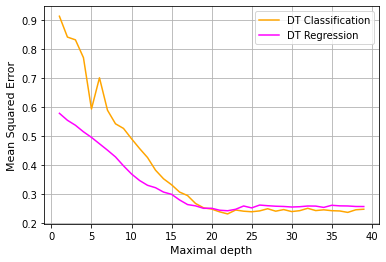

In [114]:
plt.plot(range(1, 40), acc, color='orange', label='DT Classification')
plt.plot(range(1, 40), acc2, color='magenta', label='DT Regression')

plt.xlabel('Maximal depth', fontsize=11)
plt.ylabel('Mean Squared Error', fontsize=11)
plt.legend()
plt.grid(True)
plt.show()

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Now let us find out which features are the key ones in combination prediction:

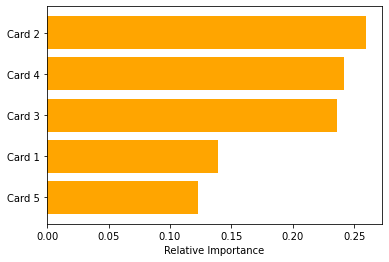

In [116]:
features = ['Card 1', 'Card 2', 'Card 3', 'Card 4', 'Card 5']
importances = clf_rf.feature_importances_
indices = np.argsort(importances)

#plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='orange', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

What is the percentage of the correct predictions?

In [117]:
correct = 0
for i in range (0, len(y_1)):
    if (round(y_1[i]) == answers_test[i]):
        correct += 1
print ("accuracy of the algorithm:", (correct / len(y_1)) * 100, "%")
correct

accuracy of the algorithm: 42.406 %


424060

Change the depth of the tree and see that MSE is decreasing, while the accuracy is growing:

In [118]:
regr_2 = DecisionTreeRegressor(max_depth=40)
regr_2.fit(features_train, answers_train)
y_2 = regr_2.predict(features_test)

Find MSE:

In [119]:
mean_squared_error(answers_test, y_2)

0.259053

Find the accuracy:

In [120]:
correct = 0
for i in range (0, len(y_2)):
    if (round(y_2[i]) == answers_test[i]):
        correct += 1
accuracy_dt_r = round(correct / len(y_2) * 100,2)
print ("accuracy of the algorithm:", (correct / len(y_2)) * 100, "%")
correct

accuracy of the algorithm: 95.2638 %


952638

# Naive Bayes

Prediction with Naive Bayes:

In [121]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB(var_smoothing = 0.2848035868435802)

#Train the model using the training sets
gnb.fit(features_train, answers_train)

#Predict the response for test dataset
y_pred = gnb.predict(features_test)


# Model Accuracy, how often is the classifier correct?
accuracy_nb = round(accuracy_score(answers_test, y_pred)*100, 2)
print("Accuracy:", accuracy_score(answers_test, y_pred))

Accuracy: 0.557004


With the usage of Gaussian Naive Bayes, find the optimal parameters:

In [122]:
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                    # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(features_train, answers_train)

gs_NB.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    5.9s finished


{'var_smoothing': 0.2848035868435802}

# Linear Regression

In [123]:
from sklearn import linear_model

In [124]:
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(features_train, answers_train)

# Make predictions using the testing set
pred = regr.predict(features_test)

print('Mean squared error: %.2f'
      % mean_squared_error(answers_test, pred))

Mean squared error: 0.53


In [125]:
correct = 0
for i in range (0, len(pred)):
    if (round(pred[i]) == answers_test[i]):
        correct += 1
accuracy_lr = round((correct / len(y_1)) * 100, 2)
print ("accuracy of the algorithm:", (correct / len(y_1)) * 100, "%")
correct

accuracy of the algorithm: 50.9953 %


509953

# Total accuracy

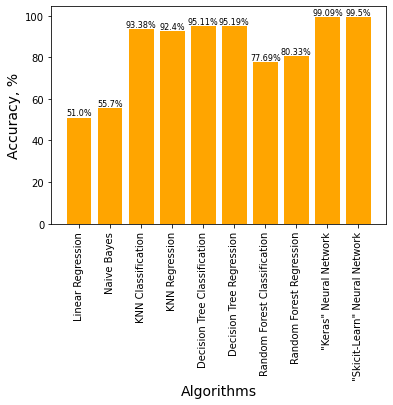

In [126]:
accuracy_lr = 51
accuracy_nb = 55.7
accuracy_knn_c = 93.38
accuracy_knn_r = 92.4
accuracy_dt_c = 95.11
accuracy_dt_r = 95.19
acc_rf_c = 77.69
acc_rf_r = 80.33
acc_nn_k = 99.09
acc_nn_s = 99.5
algorithms = ('Linear Regression', 'Naive Bayes', 'KNN Classification',
               'KNN Regression', 'Decision Tree Classification', 
                'Decision Tree Regression', 'Random Forest Classification', 'Random Forest Regression', 
              '"Keras" Neural Network', '"Skicit-Learn" Neural Network')
accuracy = [accuracy_lr, accuracy_nb, accuracy_knn_c, accuracy_knn_r,
                         accuracy_dt_c, accuracy_dt_r, acc_rf_c, acc_rf_r, acc_nn_k, acc_nn_s]


#plt.grid(True)
bar = plt.bar(algorithms, accuracy, color='orange')
plt.xlabel('Algorithms', fontsize = 14)
plt.ylabel('Accuracy, %', fontsize = 14)
#plt.title('Accuracy of the applied algorithms')
plt.xticks(rotation=90)
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%s' % str(height)+"%", ha='center', va='bottom', fontsize=8)

plt.show()